# Clustering: K-Means
---
## CASE ONE 
Ilustrasi Clustering
Source: Dummy Data

In [25]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

- make_blobs adalah library untuk bangkitkan/generate data untuk clustering.

In [26]:
x, y = make_blobs(n_samples=350, random_state=42, n_features=2)
pd.DataFrame(x)

,0,1
0,-2.412120,9.982931
1,-7.670102,-6.408641
2,-0.623012,9.188864
3,5.351494,0.848528
4,5.945358,1.994174
...,...,...
345,4.532848,0.937927
346,4.126012,0.913956
347,-6.378710,-7.857665
348,-6.808061,-7.357767


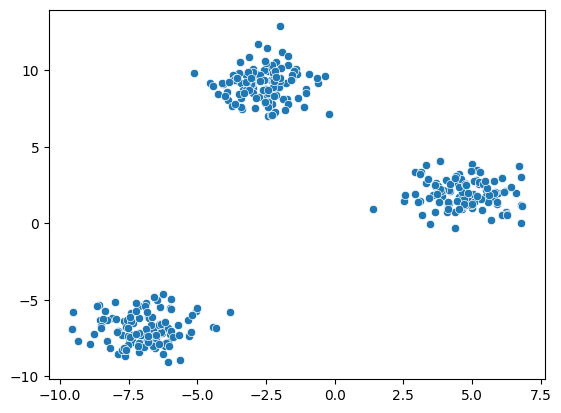

In [27]:
plt.figure()

sns.scatterplot(
    x = x[:,0],
    y = x [:,1]
)

plt.show()

In [28]:
kmeans = KMeans(n_clusters=3)
# Jika belum kelihatan bisa pakai silohuette atau elbow untuk menenuntukan n_cluster
kmeans.fit(x)

KMeans(n_clusters=3)

In [29]:
kmeans.labels_

array([0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0,
       2, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0,
       1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2,
       1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0,
       1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1,
       2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 1,
       1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2,

In [30]:
pd.DataFrame({
    'X1' : x[:,0],
    'X2' : x[:,1],
    'Cluster' : kmeans.labels_
})

,X1,X2,Cluster
0,-2.412120,9.982931,0
1,-7.670102,-6.408641,1
2,-0.623012,9.188864,0
3,5.351494,0.848528,2
4,5.945358,1.994174,2
...,...,...,...
345,4.532848,0.937927,2
346,4.126012,0.913956,2
347,-6.378710,-7.857665,1
348,-6.808061,-7.357767,1


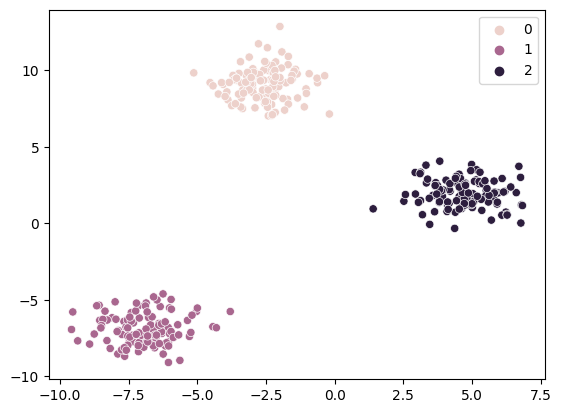

In [31]:
plt.figure()

sns.scatterplot(
    x = x[:,0],
    y = x [:,1],
    hue = kmeans.labels_
)

plt.show()

## CASE TWO
Ilustrasi Clustering
Source: Ilustration K-Means

In [32]:
data = pd.read_csv('ilustrasi k means.csv',sep=';')
data.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


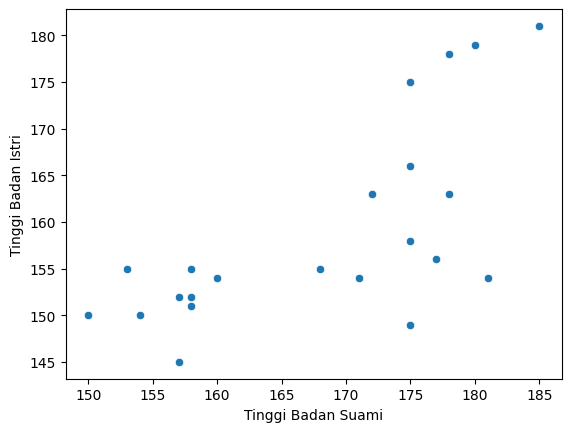

In [33]:
plt.figure()

sns.scatterplot(
    x = data['tinggibadan'],
    y = data['tinggibadanistri']
)

plt.xlabel('Tinggi Badan Suami')
plt.ylabel('Tinggi Badan Istri')

plt.show()

Kita tidak tahu cluster yang optimal, maka dari itu bisa pakai elbow atau siluet untuk mencari best clusternya.

### Elbow Method

In [34]:
#Elbow Method
k = range(1,16)
clustering = [KMeans(n_clusters=i).fit(data) for i in k] #Loop kelas clustering
centroid = [x.cluster_centers_ for x in clustering]# Menentukan nilai centroid (Pusat Data) pada setiap kluster
display(clustering)

#within sum square
D_k = [cdist(data, cent, 'euclidean') for cent in centroid] #Jarak antar data point
CIdx = [np.argmin(D,axis=1) for D in D_k] # Index 
dist = [np.min(D, axis=1) for D in D_k]
avgWSS = [sum(d)/data.shape[0] for d in dist] #Nilai rata-rata jarak terkecil
display(avgWSS)

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15)]

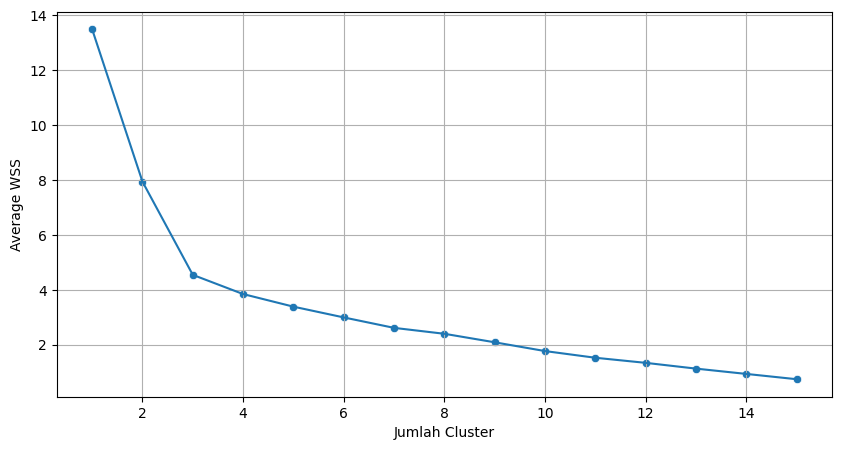

In [37]:
plt.figure(figsize=(10,5))

sns.lineplot(
    x = k,
    y = avgWSS
)

sns.scatterplot(
    x = k,
    y = avgWSS
)

plt.grid()
plt.xlabel('Jumlah Cluster')
plt.ylabel('Average WSS')

plt.show()

- Paling baik: antar anggota kluster homogen, antar kluster heterogen.
- Pada elbow kita lihat titik dia tidak berubah secara signifikan. Kita lihat 3 adalah titik dimulainya perubahan yang tidak signifikan.

CONS: perspektif dalam melihat data dari setiap orang.

In [38]:
### Silhoutte Score

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
silhouette_score(data,labels=kmeans.labels_, metric='euclidean')

0.5080353833629737

In [39]:
data.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


In [40]:
#Get Best Cluster
bestK = []

for i in range(2,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    bestK.append(silhouette_score(data,labels=kmeans.labels_, metric='euclidean'))

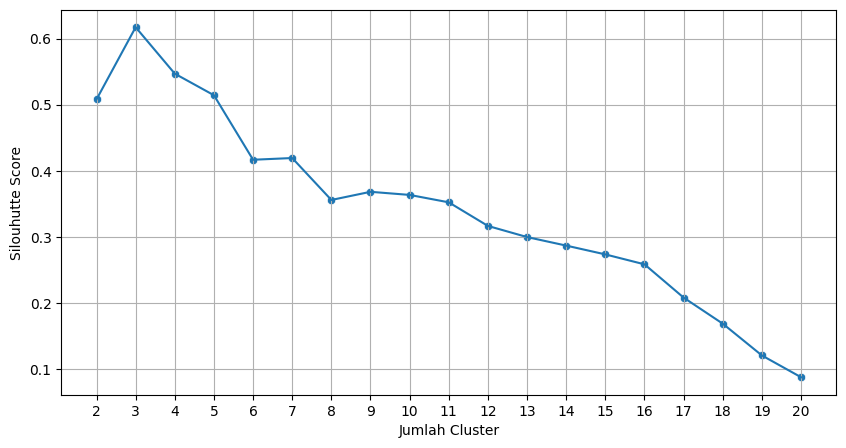

In [41]:
plt.figure(figsize=(10,5))

sns.lineplot(
    x = range(2,21),
    y = bestK
)

sns.scatterplot(
    x = range(2,21),
    y = bestK
)

plt.xticks(range(2,21))

plt.grid()
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silouhutte Score')

plt.show()

Semakin dekat 1 semakin program dapat membedakan cluster. Kita dapatkan 3

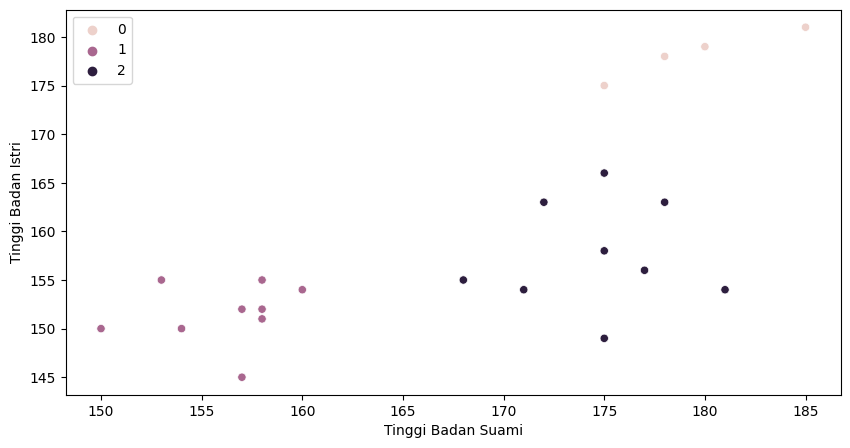

In [42]:
kmean = KMeans(n_clusters=3)
kmean.fit(data)

plt.figure(figsize=(10,5))

sns.scatterplot(
    x = data['tinggibadan'],
    y = data['tinggibadanistri'],
    hue=kmean.labels_
)

plt.xlabel('Tinggi Badan Suami')
plt.ylabel('Tinggi Badan Istri')

plt.show()

Tugas terakhir jika sudah dapat dilakukan clustering adalah melakukan descriptive pada setiap kelas.

In [43]:
data

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


# Clustering : Agglomerative
---
- Mencoba mengelompokkan dengan jarak-jarak terdekat menggunakan linkage.
- Awalnya setiap data poin adalah kelas tersendiri, kemudian akan diimplentasikan pendekatan untuk dijadikan cluster baru.
- Terdapat 3 pendekatan linkage:
    - ward linkage -> Mencari variance antar kelas (per 2 kelas), variance terkecil akan dijadikan kelas baru.
    - complete linkage -> Very sensitive to ouliers, karena akan mencari jarak terkecil (smallest max distance) antar kelas (per 2 kelas).
    - average linkage -> Mencari rata-rata paling kecil antar kelas (per 2 kelas).
    untuk melakukan kalkuklasi per 2 kelas dilakukan merge terlebih dahulu.
- Dendogram adalah final output untuk melihat hierarki clustering.
---
Issues
- Standardize features
- linkage type that we should choose.

In [44]:
#Library
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

In [45]:
data.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


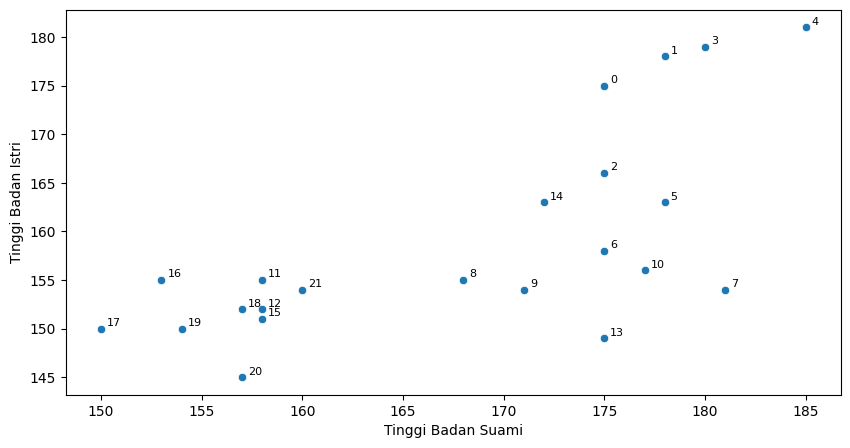

In [46]:
plt.figure(figsize=(10,5))

sns.scatterplot(
    x = data['tinggibadan'],
    y = data['tinggibadanistri']
)

plt.xlabel('Tinggi Badan Suami')
plt.ylabel('Tinggi Badan Istri')

for i in range(0,data.shape[0]):
    plt.annotate(i, (data['tinggibadan'][i]+0.3,
                     data['tinggibadanistri'][i]+0.3),fontsize=8)

plt.show()

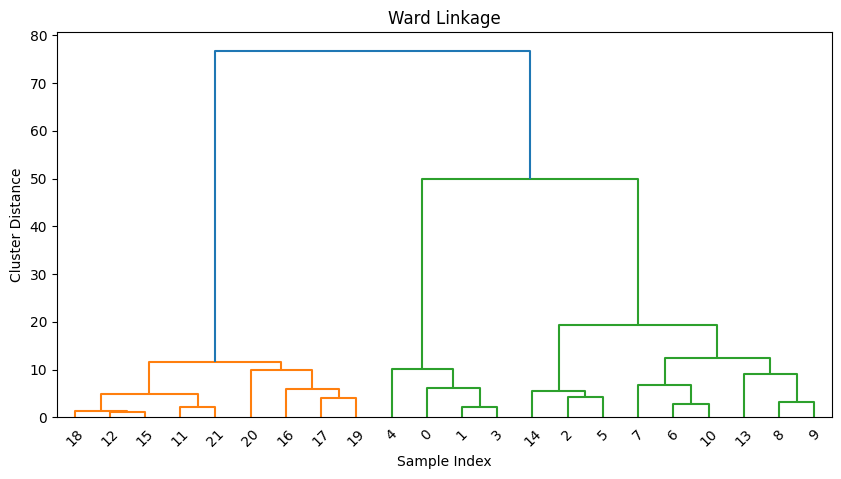

In [47]:
linkage = ward(data)
plt.figure(figsize=(10,5))

dendrogram(linkage)

plt.title('Ward Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')

plt.show()

In [48]:
agg_ward = AgglomerativeClustering(n_clusters=3,linkage='ward')
data['WardLabel'] = agg_ward.fit_predict(data)
data

,tinggibadan,tinggibadanistri,WardLabel
0,175,175,2
1,178,178,2
2,175,166,0
3,180,179,2
4,185,181,2
5,178,163,0
6,175,158,0
7,181,154,0
8,168,155,0
9,171,154,0


# **Tugas : Clustering**
1. Data : Boston House Proce (Gunakan hanya feature numerikal)
2. Perlakuan : Tentukan harus pake scaling atau tidak
3. Gunakan K Means Clustering, tentukan best K nya.
4. Buatlah visualisasi setelah mendapatkan clusternya. Coba lihat persebaran clusternya secara umum (bisa dengan 2 atau 3 dimensi)
5. Gambarkan secara umum setiap clusternya (berikan label)